In [14]:
! git pull

Already up to date.


In [15]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
qemu_path = os.getenv('MOD_QEMU')
results_root = f'{qemu_path}/evals/runs'


In [40]:
def get_avg_duration(size, runsdir=''):
    durations = []
    # empty df
    events = pd.DataFrame()
    df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run1G/run8.csv')
    events = df.iloc[:,2]
    
    
    for i in range(1,11):
        df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run{size}G/run{i}.csv')
        events = df.iloc[:,2]
        
        df = df.iloc[:,-1]
        durations.append(df)

    # create a new dataframe with the average of the last column of all the csv files
    df = pd.concat(durations, axis=1).mean(axis=1)
    # print(df.to_string(index=False))
    # print(events.to_string(index=False))
    # combine df and events
    df = pd.concat([events, df], axis=1)
    df.columns = ['event', 'duration']
    return df

## Vanilla

In [42]:
df1 = get_avg_duration(1, 'backup/run_vanilla')
df2 = get_avg_duration(2, 'backup/run_vanilla')
df3 = get_avg_duration(3, 'backup/run_vanilla')
df4 = get_avg_duration(4, 'backup/run_vanilla')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,98.037,98.740,98.910,98.960
2,Started wait for iothread lock,0.530,0.770,0.785,0.780
3,Acquired iothread lock,0.069,0.100,0.103,0.090
4,HMP done in parent,0.232,0.080,0.149,0.080
5,Starting forkall,71238.641,30405.949,37831.952,83446.128
6,Starting child,79.321,99.962,90.759,99.569
7,Restored threads,1.069,1.538,1.447,1.242
8,NaN,0.010,NaN,0.010,NaN
9,NaN,269.595,NaN,301.380,NaN


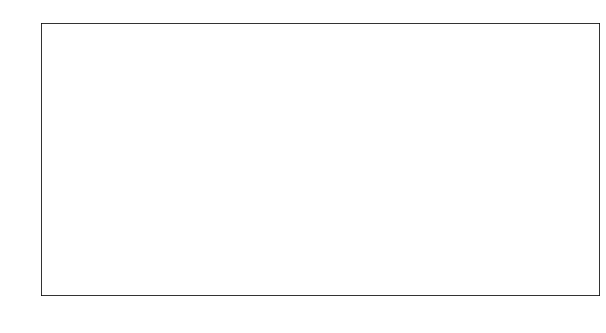

In [26]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()



In [27]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

15.844999999999999


## ODF Enabled

In [28]:
df1 = get_avg_duration(1, 'backup/run_vanilla')
df2 = get_avg_duration(2, 'backup/run_vanilla')
df3 = get_avg_duration(3, 'backup/run_vanilla')
df4 = get_avg_duration(4, 'backup/run_vanilla')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)

df

,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,98.037,98.740,98.910,98.960
2,Started wait for iothread lock,0.530,0.770,0.785,0.780
3,Acquired iothread lock,0.069,0.100,0.103,0.090
4,HMP done in parent,0.232,0.080,0.149,0.080
5,Starting forkall,71238.641,30405.949,37831.952,83446.128
6,Starting child,79.321,99.962,90.759,99.569
7,Restored threads,1.069,1.538,1.447,1.242
8,NaN,0.010,NaN,0.010,NaN
9,NaN,269.595,NaN,301.380,NaN


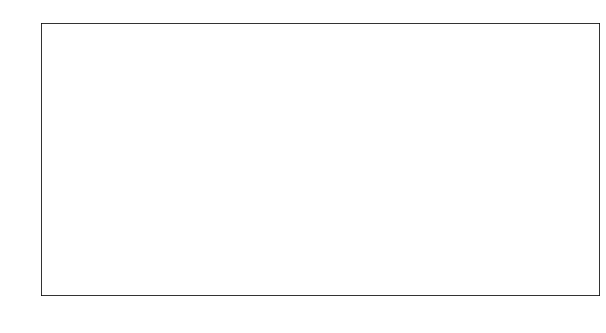

In [29]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()



In [30]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

15.844999999999999
